## Decision Trees and Support Vector Machines

In this notebook, we'll look at decision trees and support vector machines for classification.  Decisions trees split data along a single variables in a binary way, that is into two parts.  The goal is to get to leafs or nodes that are relatively homogenous because homogeneity makes for better prediction.  The trees here will use a Gini impurity index.  

Support vector machines (or support vector classifiers) are classifiers that try to find decision boundaries that have some separation between the classes.  This is similar to what LDA or QDA do but with SVM's the tradeoff is made of trying to find more robust separation, wider regions of separation between the classes, in exchange for making a some errors.  The hope is that the wider regions of separation will yield better out of sample or cross validation performance.

In [3]:
# import libraries that we need

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
import seaborn as sns

import scipy.stats as stats


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


In [4]:
# Visualizing confusion matrices for each classifier
# Here's another function for plotting the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')If we have a bumpy but somewhat smooth boundary, which of these methods is likely to work best on out of sample data: Logistic, LDA, QDA, kNN?  Why?
    plt.show()

In [5]:
# read in the bcancer data
bcancer = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/BreastCancer.csv", na_values=['NA'])
bcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       569 non-null    object 
 1   Radius          569 non-null    float64
 2   Texture         569 non-null    float64
 3   Perimeter       569 non-null    float64
 4   Area            569 non-null    float64
 5   Smoothness      569 non-null    float64
 6   Compactness     569 non-null    float64
 7   Concavity       569 non-null    float64
 8   Concave Points  569 non-null    float64
 9   Symmetry        569 non-null    float64
dtypes: float64(9), object(1)
memory usage: 44.6+ KB


In [20]:
# Choose the features X and target y
X=bcancer[['Concavity','Texture','Radius','Area']]
y = bcancer['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
dtree = DecisionTreeClassifier(random_state=42)

# Train the classifier
dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtree.predict(X_test)

# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Evaluate the model with out of sample prediction
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

[[62  9]
 [10 33]]
Accuracy: 0.8333333333333334


More details on DecisionTreeClassifier can be found here:
[<https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html>]

Let's make a visualization of the performance results that is a bit easier to digest.  

Object `Why` not found.


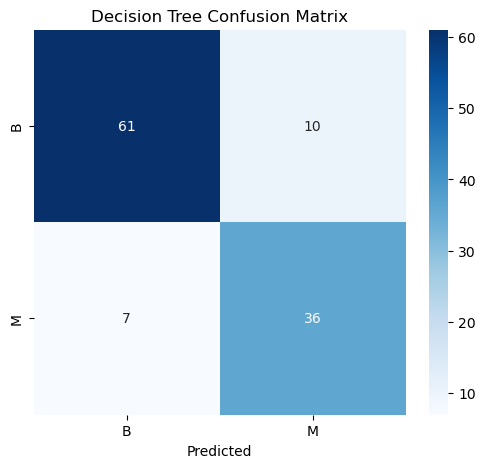

In [7]:
feature_names = ['Concavity','Texture','Radius','Area']
target_names = ['B','M']
plot_confusion_matrix(y_test, y_pred, 'Decision Tree Confusion Matrix')

Now let's visualize the tree itself

[Text(0.6215909090909091, 0.9583333333333334, 'Texture <= 696.25\ngini = 0.467\nsamples = 455\nvalue = [286, 169]\nclass = B'),
 Text(0.3431818181818182, 0.875, 'Radius <= 13.095\ngini = 0.233\nsamples = 319\nvalue = [276, 43]\nclass = B'),
 Text(0.15454545454545454, 0.7916666666666666, 'Area <= 0.073\ngini = 0.106\nsamples = 214\nvalue = [202, 12]\nclass = B'),
 Text(0.09090909090909091, 0.7083333333333334, 'Concavity <= 0.016\ngini = 0.052\nsamples = 189\nvalue = [184, 5]\nclass = B'),
 Text(0.05454545454545454, 0.625, 'Concavity <= 0.016\ngini = 0.147\nsamples = 50\nvalue = [46, 4]\nclass = B'),
 Text(0.03636363636363636, 0.5416666666666666, 'Area <= 0.063\ngini = 0.115\nsamples = 49\nvalue = [46, 3]\nclass = B'),
 Text(0.01818181818181818, 0.4583333333333333, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]\nclass = B'),
 Text(0.05454545454545454, 0.4583333333333333, 'Area <= 0.063\ngini = 0.291\nsamples = 17\nvalue = [14, 3]\nclass = B'),
 Text(0.03636363636363636, 0.375, 'gini = 0.0\ns

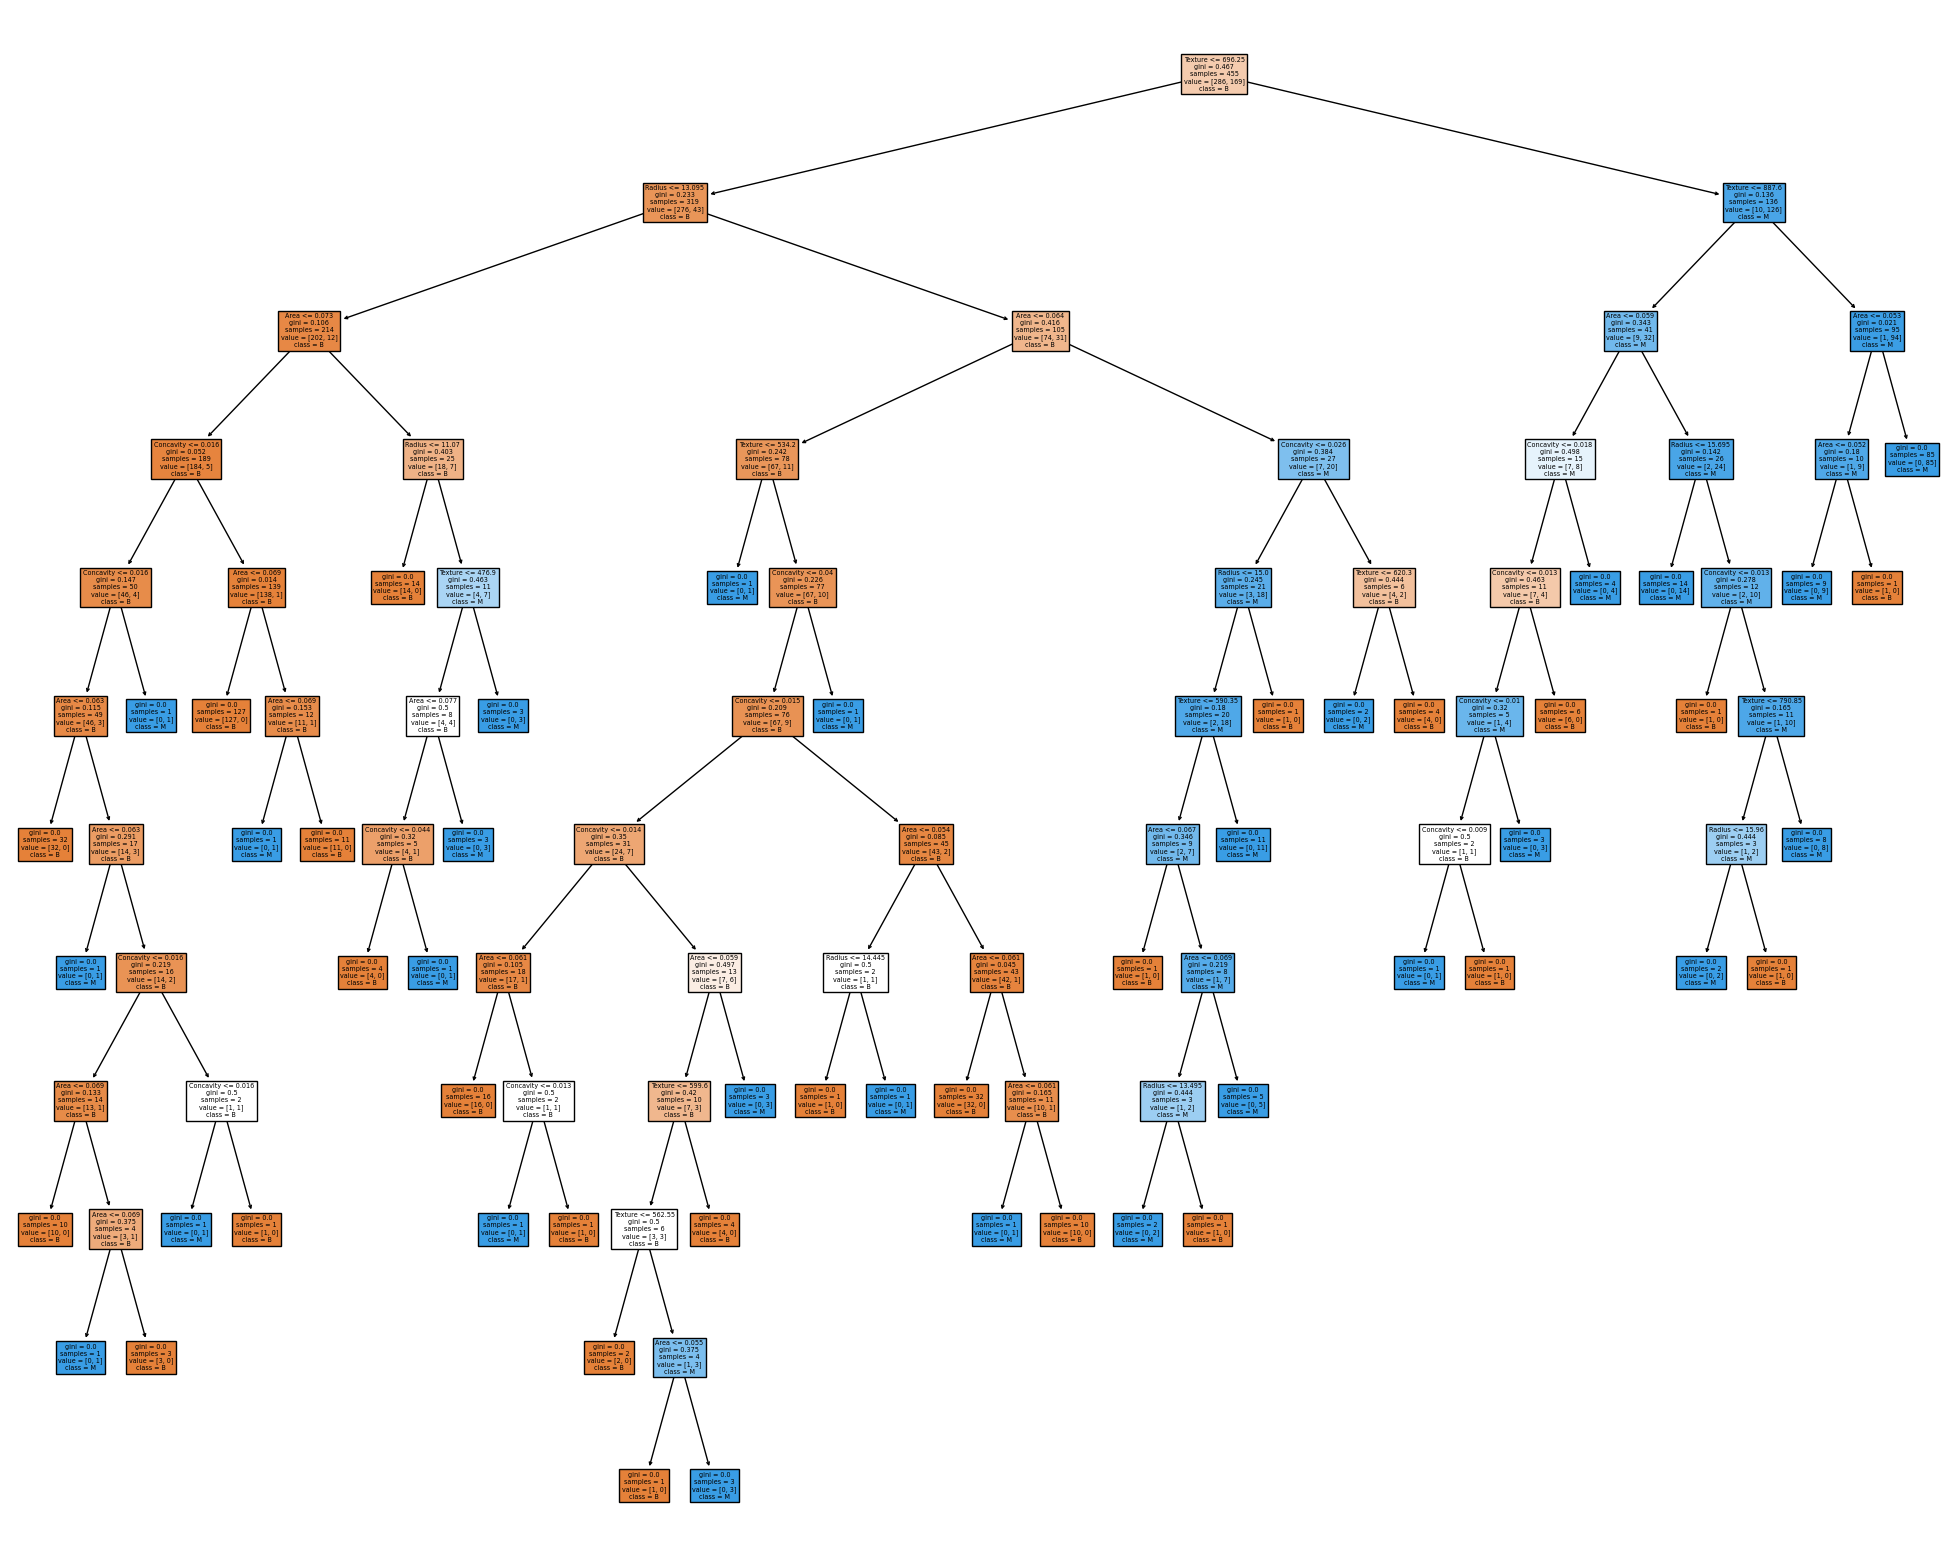

In [8]:
# create a plot of the decision tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtree,
                   feature_names=['Concavity','Texture','Radius','Area'],
                   class_names=['B','M'],
                   filled=True)

The tree above is quite deep. Looks like it has a depth of 10 splits.  That's quite a few.  It is also possible, maybe even likely, that the tree is overfit given how many different branches/splits there are and the depth of the tree.

Let's look at a version that is pruned.  We'll start with a tree that has *max_depth* of 4.  

In [9]:
dt_pre_pruned = DecisionTreeClassifier(max_depth=4, min_samples_split=5, min_samples_leaf=2)

# Train the model
dt_pre_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5)

Here's a plot of that tree.

[Text(0.5431034482758621, 0.9, 'Texture <= 696.25\ngini = 0.467\nsamples = 455\nvalue = [286, 169]\nclass = B'),
 Text(0.27586206896551724, 0.7, 'Radius <= 13.095\ngini = 0.233\nsamples = 319\nvalue = [276, 43]\nclass = B'),
 Text(0.13793103448275862, 0.5, 'Area <= 0.073\ngini = 0.106\nsamples = 214\nvalue = [202, 12]\nclass = B'),
 Text(0.06896551724137931, 0.3, 'Concavity <= 0.016\ngini = 0.052\nsamples = 189\nvalue = [184, 5]\nclass = B'),
 Text(0.034482758620689655, 0.1, 'gini = 0.147\nsamples = 50\nvalue = [46, 4]\nclass = B'),
 Text(0.10344827586206896, 0.1, 'gini = 0.014\nsamples = 139\nvalue = [138, 1]\nclass = B'),
 Text(0.20689655172413793, 0.3, 'Radius <= 11.07\ngini = 0.403\nsamples = 25\nvalue = [18, 7]\nclass = B'),
 Text(0.1724137931034483, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = B'),
 Text(0.2413793103448276, 0.1, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = M'),
 Text(0.41379310344827586, 0.5, 'Area <= 0.064\ngini = 0.416\nsamples = 105\nvalue 

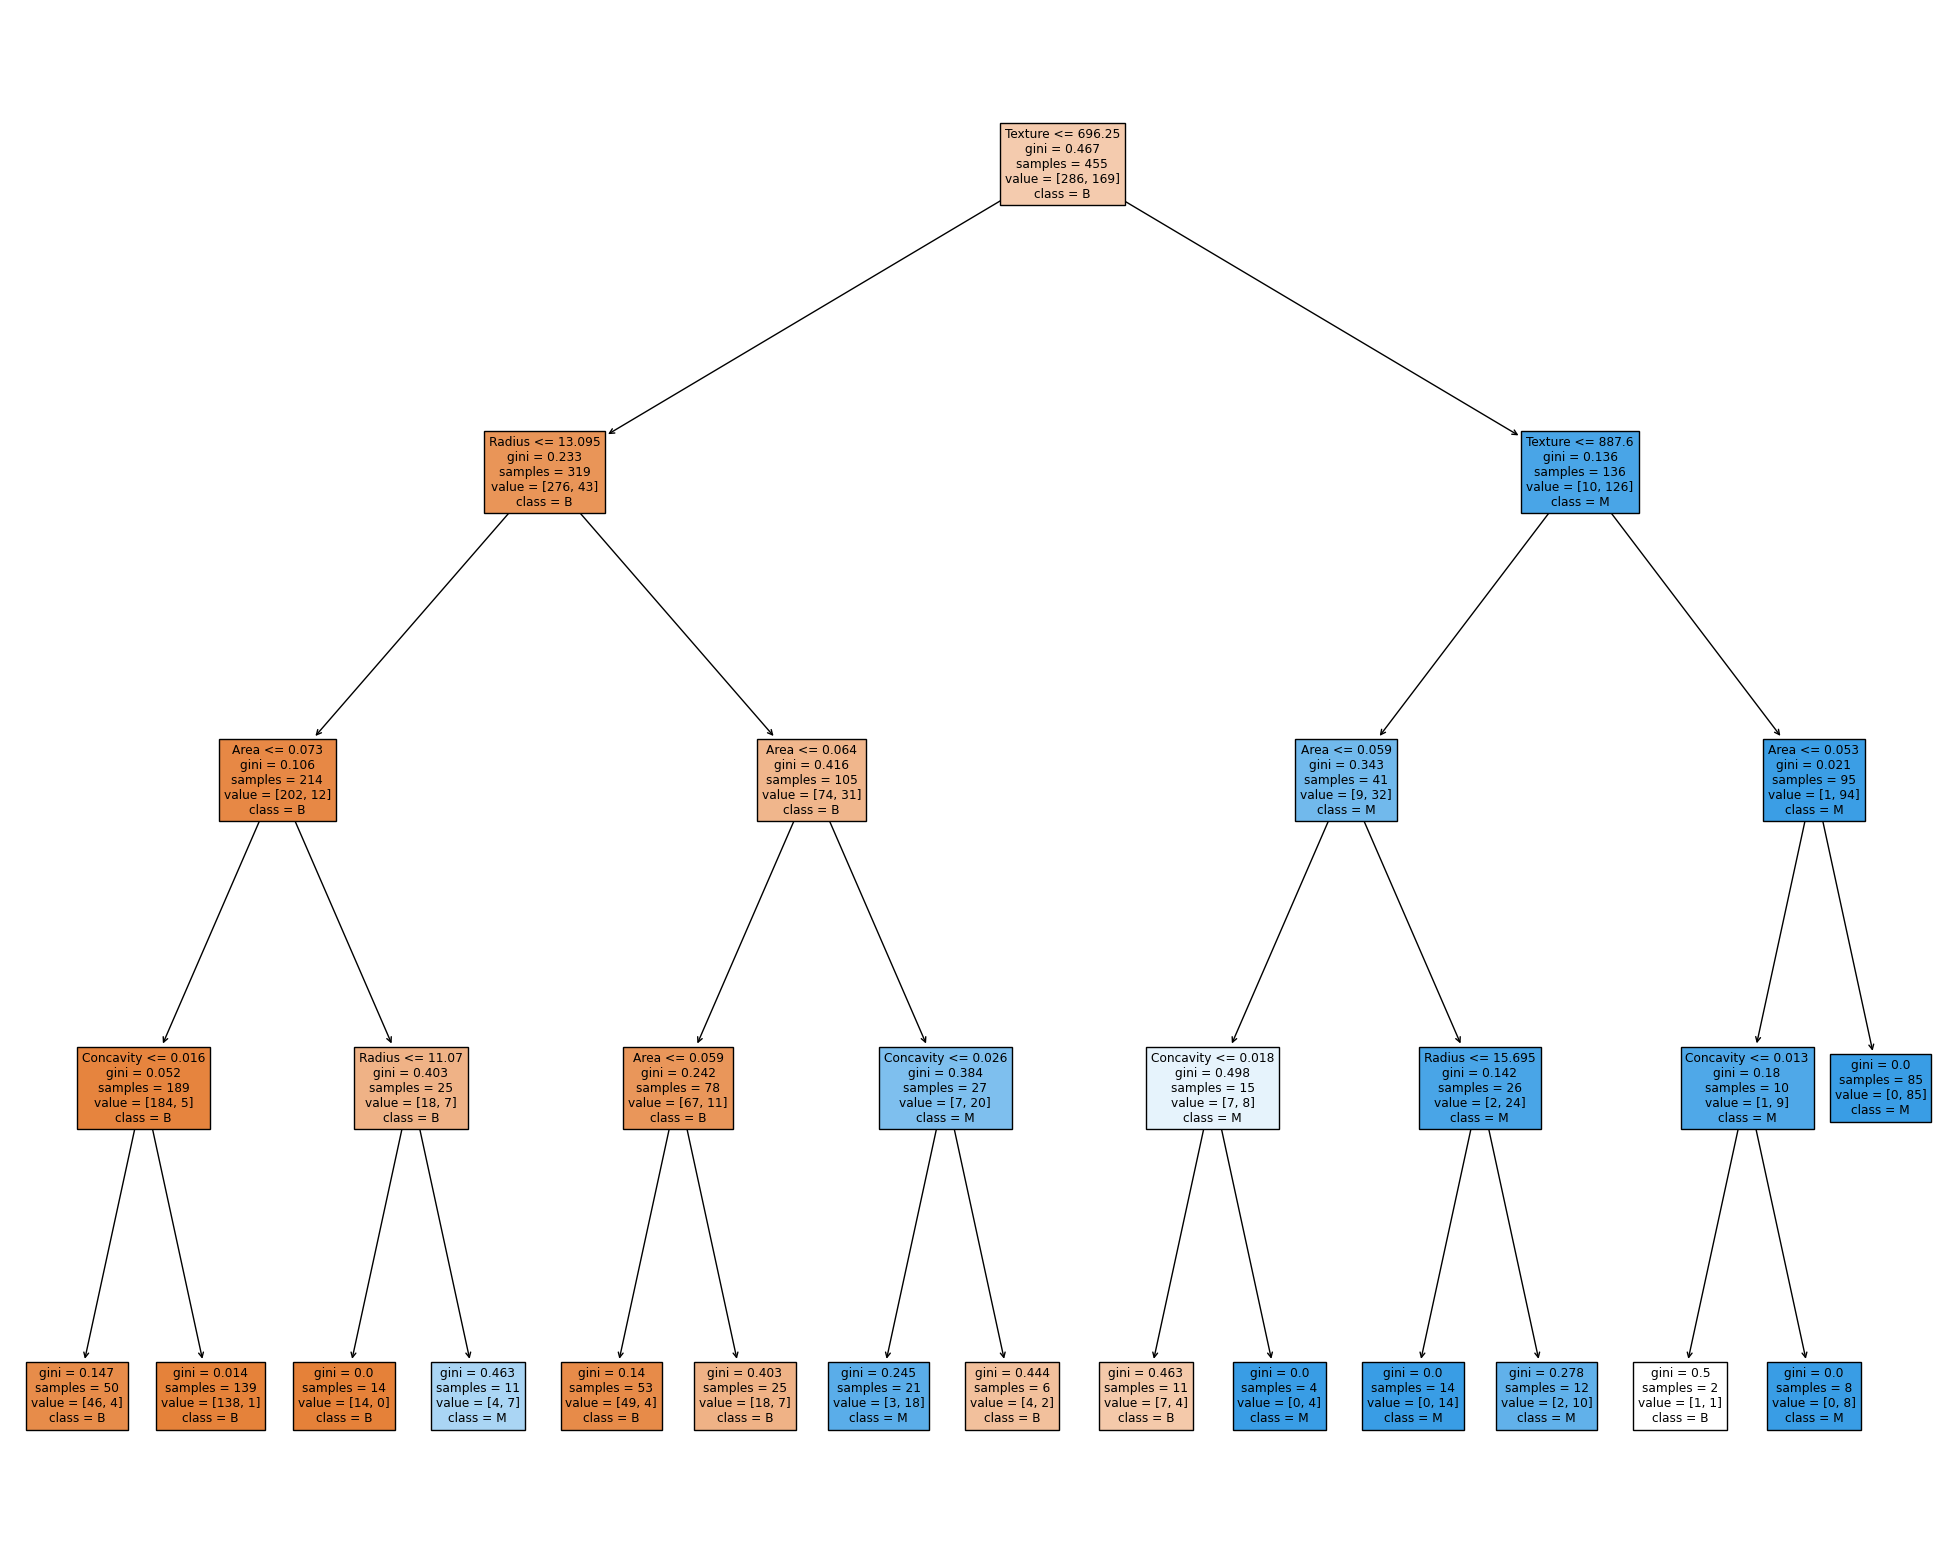

In [10]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt_pre_pruned,
                   feature_names=['Concavity','Texture','Radius','Area'],
                   class_names=['B','M'],
                   filled=True)

And here's the test performance.

Accuracy: 0.868421052631579
Object `Why` not found.


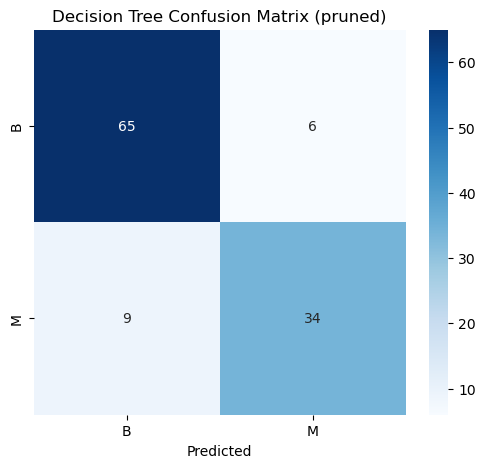

In [11]:
y_pred = dt_pre_pruned.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

plot_confusion_matrix(y_test, y_pred, 'Decision Tree Confusion Matrix (pruned)')

Performance has gone up slightly.  Let's try pruning further.

Accuracy: 0.9385964912280702
Object `Why` not found.


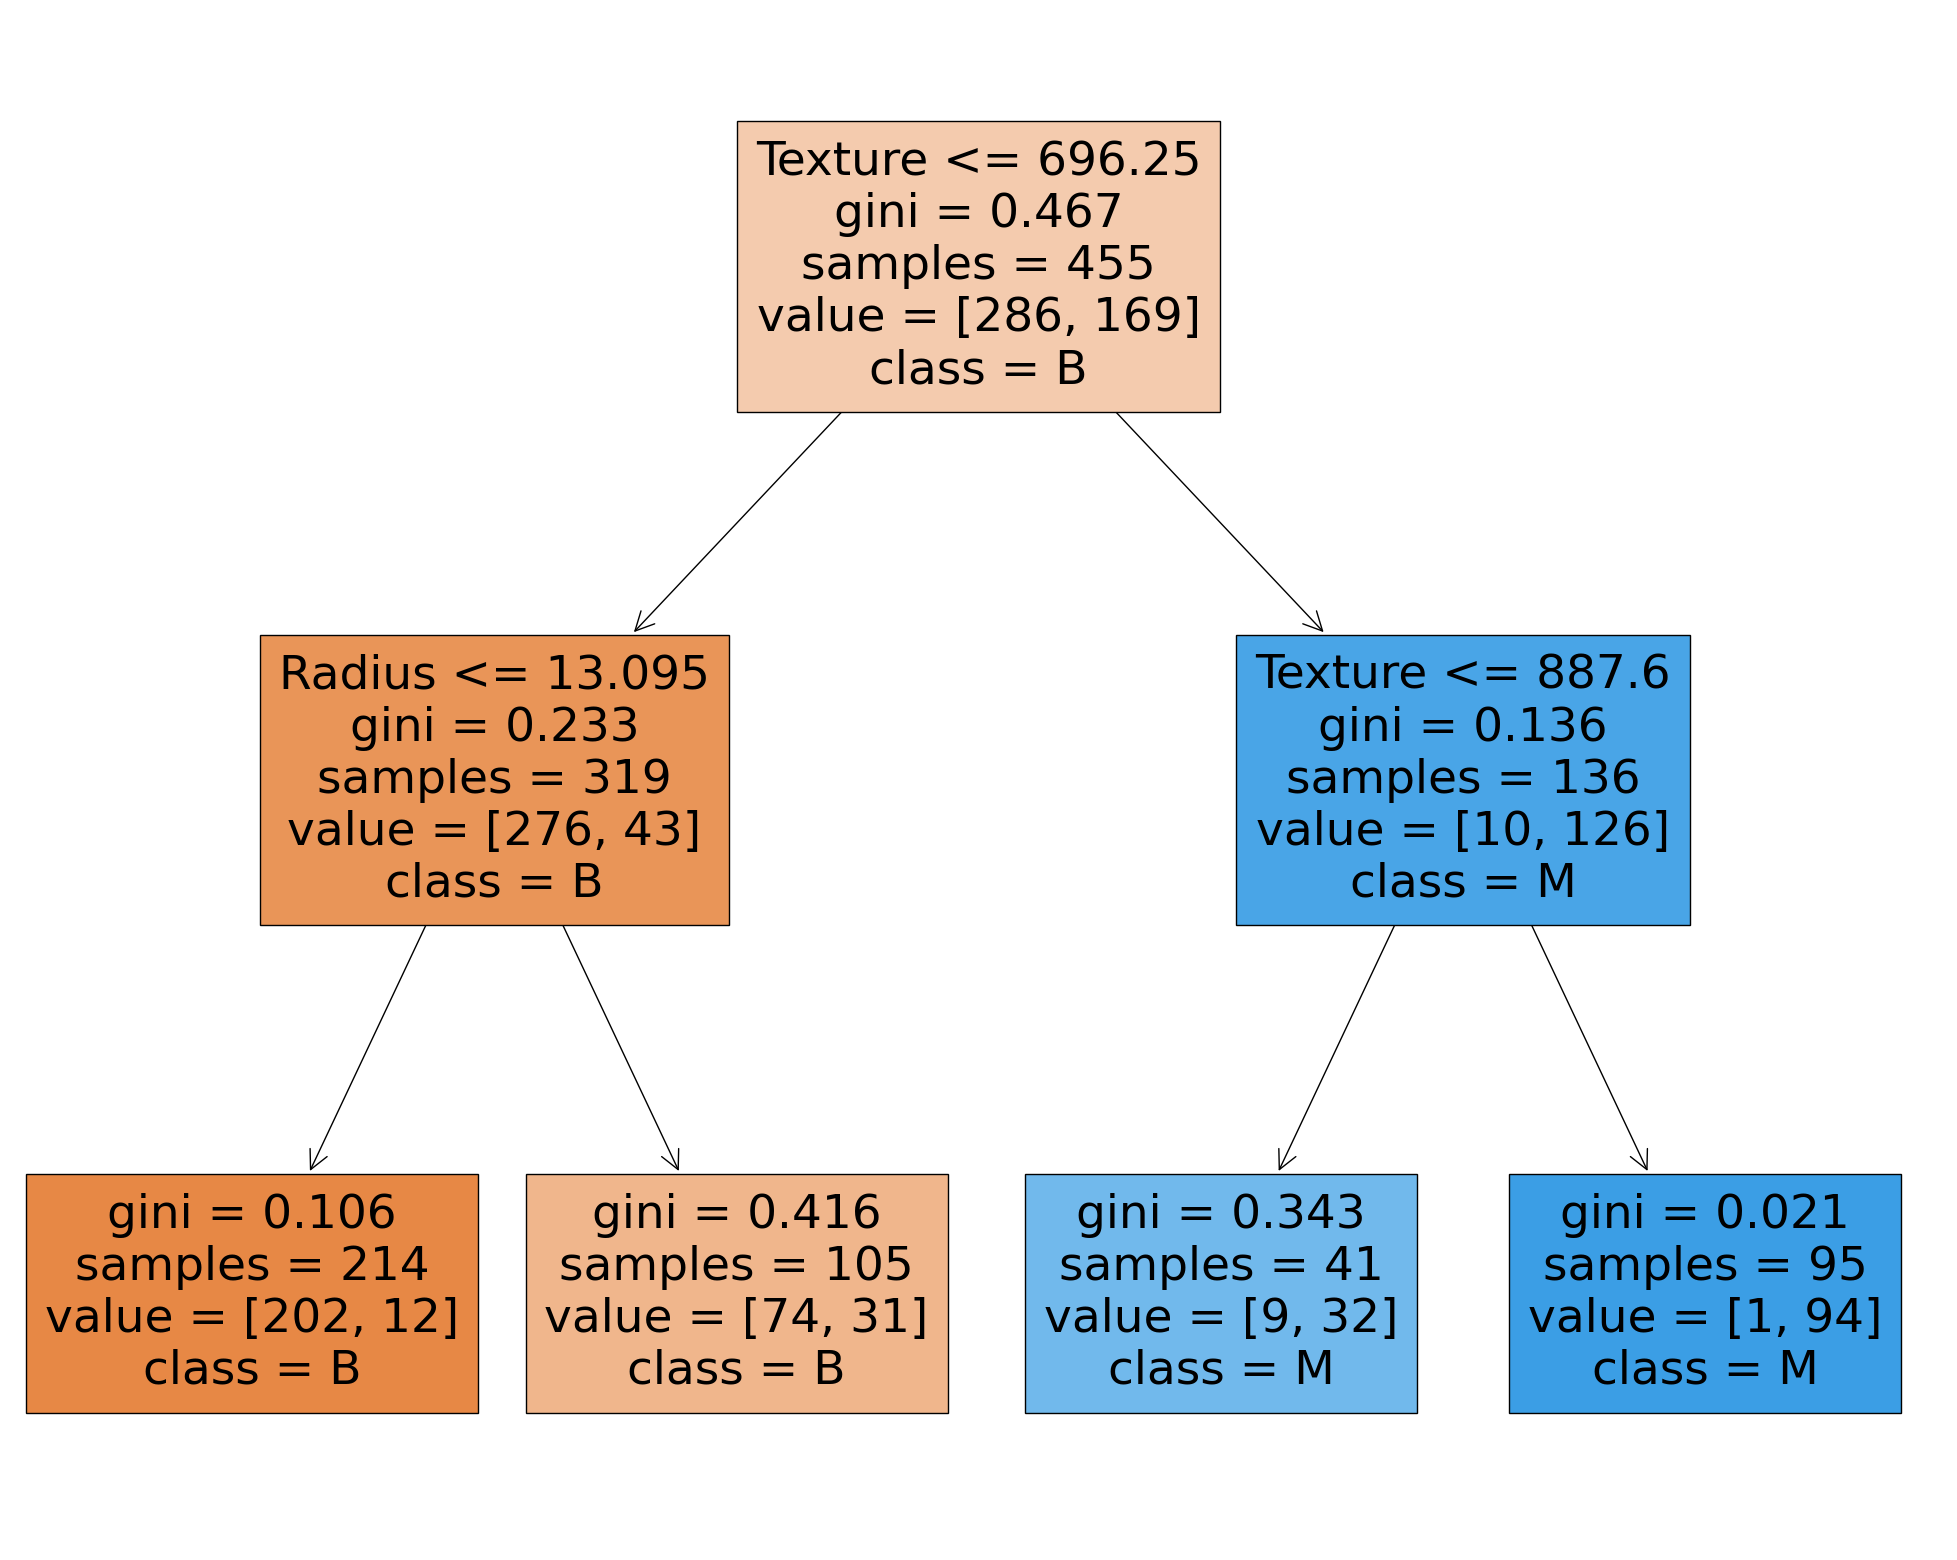

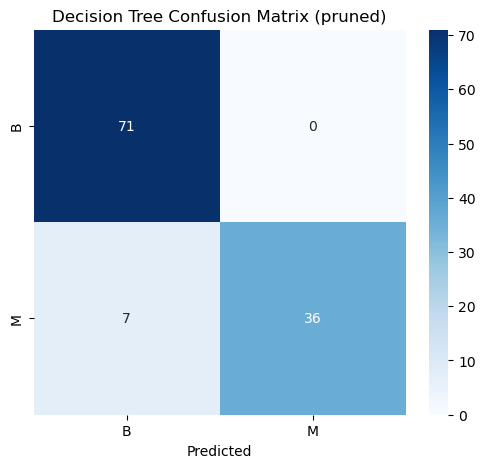

In [12]:
dt_pre_pruned2 = DecisionTreeClassifier(max_depth=2, min_samples_split=5, min_samples_leaf=2)

# Train the model
dt_pre_pruned2.fit(X_train, y_train)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt_pre_pruned2,
                   feature_names=['Concavity','Texture','Radius','Area'],
                   class_names=['B','M'],
                   filled=True)

y_pred = dt_pre_pruned2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

plot_confusion_matrix(y_test, y_pred, 'Decision Tree Confusion Matrix (pruned)')

So this is a better tree by far than the previous.  We can also clearly see which of the features is important for this classification.

Linear SVM accuracy: 92.98%
Object `Why` not found.


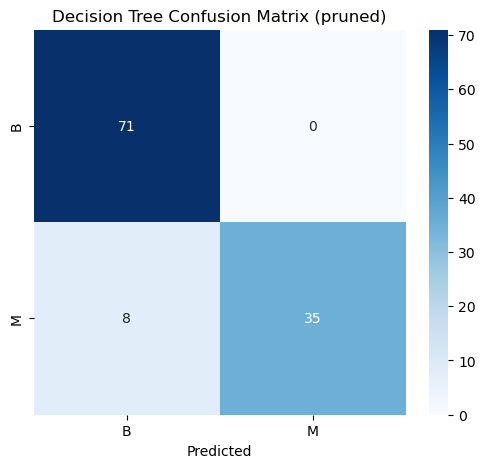

In [13]:

# 1. Linear Kernel SVM

# Create a linear kernel SVM model
linear_svm = SVC(kernel='linear')

# Train the model on the training data
linear_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_svm.predict(X_test)

# Calculate accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear SVM accuracy: {accuracy_linear * 100:.2f}%")

plot_confusion_matrix(y_test, y_pred_linear, 'Decision Tree Confusion Matrix (pruned)')

The support vector machine we used above creates a linear decision boundary.  

Below we will look at the Radial Basis Function (RBF) Kernel which allows for distance based decision boundaries.  

RBF Kernel SVM accuracy: 92.11%
Object `Why` not found.


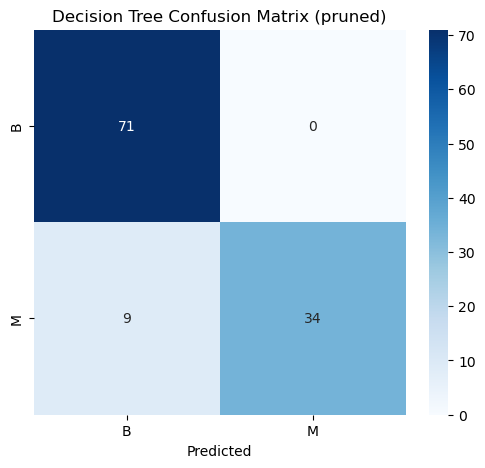

In [14]:

# Create an RBF kernel SVM model
rbf_svm = SVC(kernel='rbf')

# Train the model on the training data
rbf_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rbf = rbf_svm.predict(X_test)

# Calculate accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF Kernel SVM accuracy: {accuracy_rbf * 100:.2f}%")

plot_confusion_matrix(y_test, y_pred_rbf, 'Decision Tree Confusion Matrix (pruned)')

The *rbf* kernel that we use here is a radial basis function and as the name suggests it is a function of $$exp^d$$ where $d$ is the Euclidean distance/radial distance between two vectors.  This allows for the creation of decision boundaries that are based upon the 


[<https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html>]

[<https://en.wikipedia.org/wiki/Radial_basis_function_kernel>]

So far we have just used a single split to evaluate the performance of our models.  Let's do some cross validation of our models.  And we are lucky that this is made easy for us by having a function that does cross-validation and accuracy in one fell swoop.  That function is *cross_val_score*.

## Cross Validation

In [15]:

# Cross-validation for linear kernel
cv_scores_linear = cross_val_score(linear_svm, X, y, cv=5)  # 5-fold cross-validation
print(f"Linear Kernel SVM cross-validation accuracy: {cv_scores_linear.mean() * 100:.2f}%")

# Cross-validation for RBF kernel
cv_scores_rbf = cross_val_score(rbf_svm, X, y, cv=5)  # 5-fold cross-validation
print(f"RBF Kernel SVM cross-validation accuracy: {cv_scores_rbf.mean() * 100:.2f}%")

#

Linear Kernel SVM cross-validation accuracy: 88.76%
RBF Kernel SVM cross-validation accuracy: 88.58%


### Tasks 

1.   Using Texture, Radius, Area, Compactness and Smoothness, run 8 fold cross validation for the following models: logistic regression, SVM with linear kernel, SVM with RBF kernel, decision tree with depth of 3, decision tree with depth of 5.  Report which method did performed the best.  


In [22]:
# Using Texture, Radius, Area, Compactness and Smoothness, run 8 fold cross validation for logistic regression

# Create a logistic regression model
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()

# Perform 8-fold cross-validation
cv_scores = cross_val_score(logreg, X, y, cv=8)

# Print the cross-validation scores
print(f"Logistic Regression cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")


Logistic Regression cross-validation accuracy: 88.40%


In [23]:
# Using Texture, Radius, Area, Compactness and Smoothness, run 8 fold cross validation for SVM with linear kernel

# Create a linear kernel SVM model
linear_svm = SVC(kernel='linear')

# Perform 8-fold cross-validation
cv_scores = cross_val_score(linear_svm, X, y, cv=8)

# Print the cross-validation scores
print(f"Linear Kernel SVM cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")

Linear Kernel SVM cross-validation accuracy: 89.11%


In [24]:
# Using Texture, Radius, Area, Compactness and Smoothness, run 8 fold cross validation for SVM with RBF kernel

# Create an RBF kernel SVM model
rbf_svm = SVC(kernel='rbf')

# Perform 8-fold cross-validation
cv_scores = cross_val_score(rbf_svm, X, y, cv=8)

# Print the cross-validation scores
print(f"RBF Kernel SVM cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")

RBF Kernel SVM cross-validation accuracy: 88.40%



2. Write a paragraph summarizing the analysis you did in Task 1 and explaining the model to a classmate.  Include a visualization of the performance of the model.

